# Implementing a toy denoiser from scratch 

Implementing a toy denoiser for the MNIST dataset from scratch. 
The denoiser is trained on the MNIST dataset with added noise. 

(1) Get and prepare the data for training / validation 
(2) Define the model
(3) Train the model
(4) Evaluate the model

### TODO and log:
- Once the model works, imlplement simoncellis paper iteration loop. 


In [1]:
# Define logging and experiment parameters
from datetime import datetime
import os
import logging
import torch

# Define experiment log directory and create it if it doesn't exist
log_dir = f'runs/denoiser_test_{datetime.now().strftime("%Y%m%d_%H:%M:%S")}'
os.makedirs(log_dir, exist_ok=True)

# Define experiment parameters
batch_size = 64
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Set up logging and add relevant information
logging.basicConfig(
    filename=os.path.join(log_dir, "experiment.log"),
    level=logging.INFO,
    format=" %(message)s",
)
logging.info(
    "Experiment started at {}".format(datetime.now().strftime("%Y%m%d-%H%M%S"))
)
logging.info("Batch size: {}".format(batch_size))
logging.info("Device: {}".format(device))

%load_ext autoreload
%autoreload 2

Using cuda device


# Get data, init the mdoel, and train it

[load_data]: Data loaders created
[load_data]: Training data size: 60000
[load_data]: Test data size: 10000


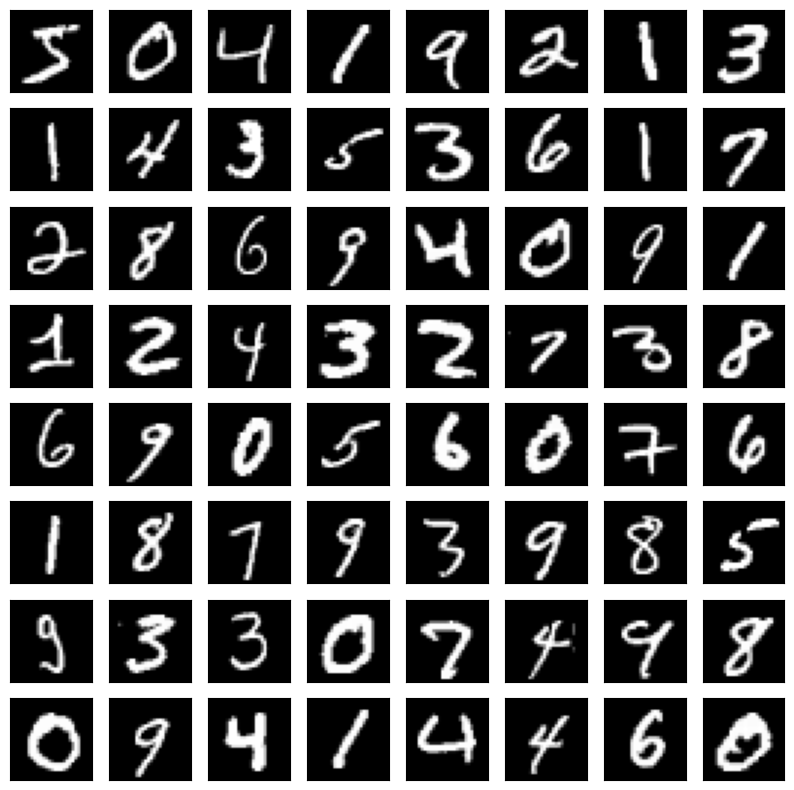

In [14]:
from data import load_data
from utils import show_batch

train_dataloader, test_dataloader = load_data(batch_size=batch_size)
fig = show_batch(next(iter(train_dataloader))[0])

In [3]:
# Define the model and train it
from model import init_model

model, loss_fn, optimizer = init_model(depth=10)
model = model.to(device)

In [ ]:
from train import train

model = train(
    logdir=log_dir,
    epochs=20,
    model=model,
    train_dataloader=train_dataloader,
    val_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    device=device,
)

### Visualize some results 


Text(0.5, 0.98, 'Denoised')

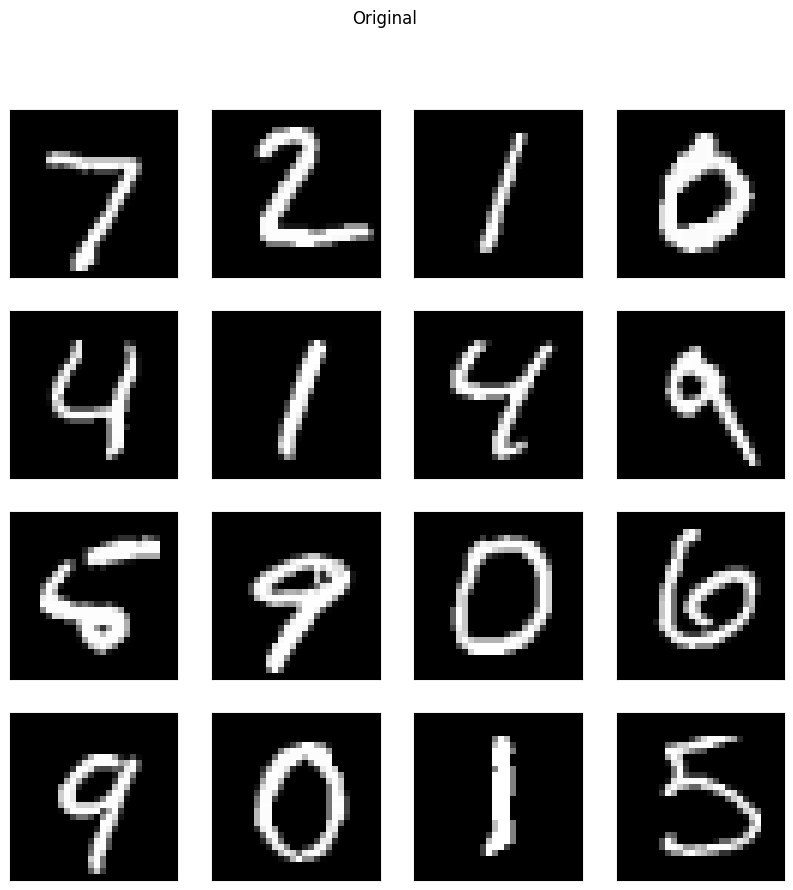

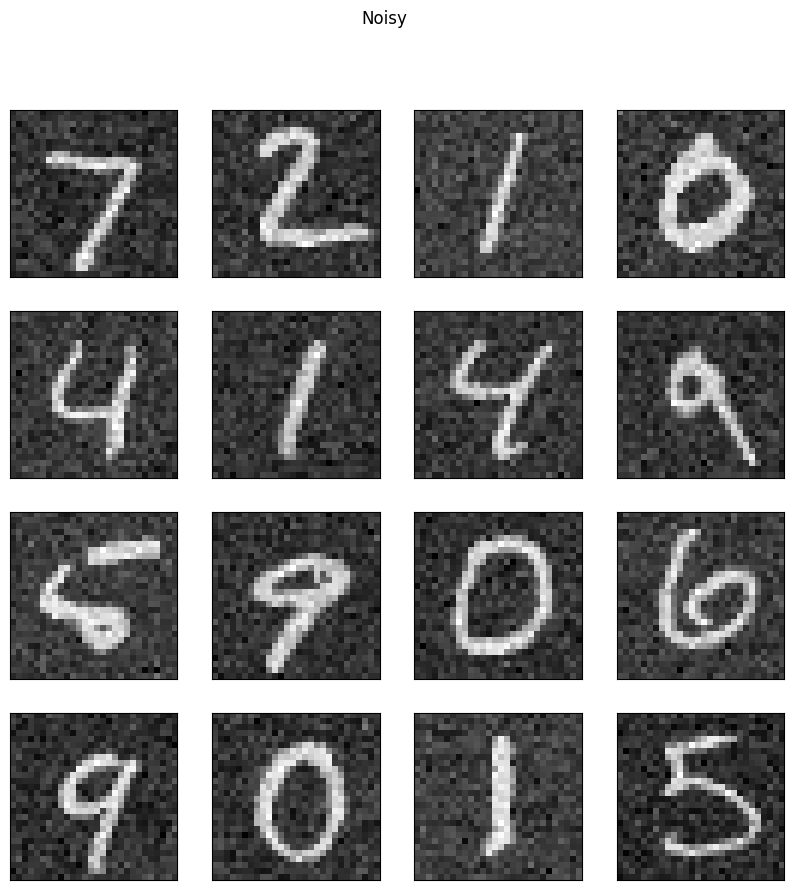

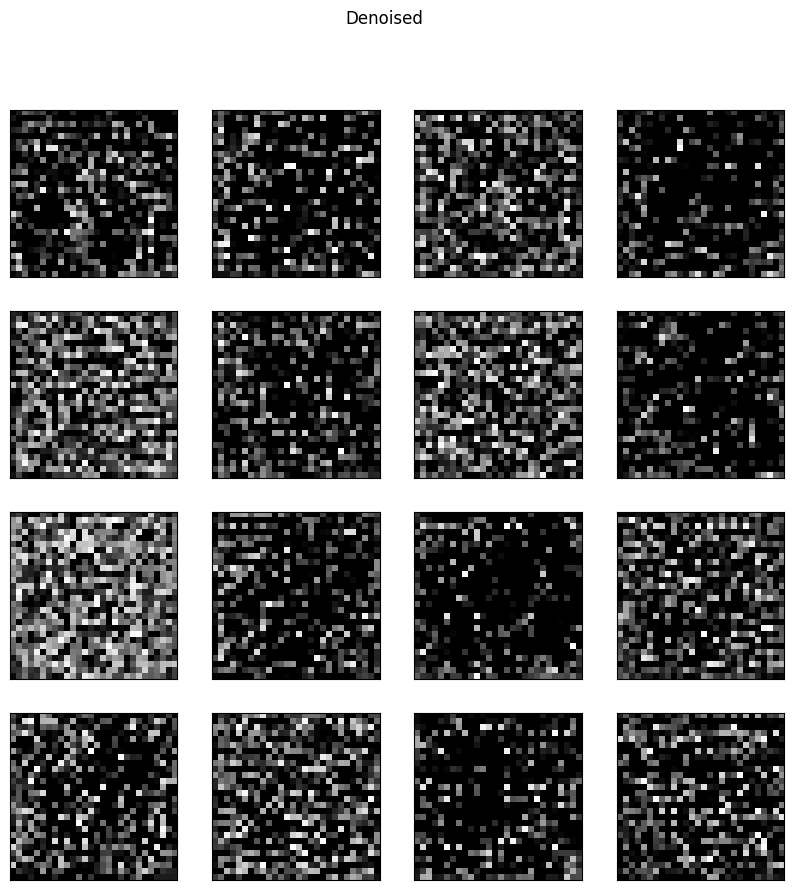

In [13]:
from utils import add_gaussian_noise, batch_img_normalize, show_batch

X = next(iter(test_dataloader))[0]
X_noisy = batch_img_normalize(add_gaussian_noise(X))
X_denoised = model(X_noisy.to(device))
X, X_noisy, X_denoised = X.to("cpu"), X_noisy.to("cpu"), X_denoised.to("cpu")

fig = show_batch(X[:16])
fig.suptitle("Original")
fig = show_batch(X_noisy[:16])
fig.suptitle("Noisy")
fig = show_batch(X_denoised[:16])
fig.suptitle("Denoised")